In [ ]:
# UPDATED: 14/11/2024
# URL: https://seaborn.pydata.org/tutorial/regression.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/Clara del Rey/BIG DATA/Programacion/FTP/000 Datos/"
# path = "../datos/"

edades = pd.read_csv(path + "statage.csv")
edades.head()

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,24.0,0.941524,86.452201,0.040322,79.910844,80.729773,81.991714,84.102892,86.452201,88.805249,90.926191,92.196879,93.022654
1,1,24.5,1.007208,86.861609,0.040396,80.260371,81.088685,82.364010,84.494706,86.861609,89.228048,91.357530,92.631767,93.459230
2,1,25.5,0.837251,87.652473,0.040578,81.005294,81.834452,83.113871,85.258877,87.652473,90.056755,92.229661,93.534066,94.382780
3,1,26.5,0.681493,88.423264,0.040723,81.734157,82.564061,83.847162,86.005173,88.423264,90.862604,93.076082,94.408849,95.277617
4,1,27.5,0.538780,89.175492,0.040833,82.448456,83.278986,84.565344,86.735069,89.175492,91.647114,93.898271,95.257541,96.145118


Recta de regresión





In [ ]:
chicos = edades[edades.Sex == 1]

<Axes: xlabel='Agemos', ylabel='M'>

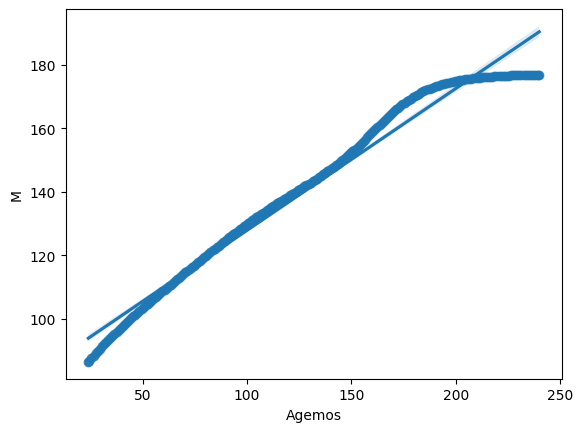

In [ ]:
sns.regplot(
    x=chicos.Agemos,
    y=chicos.M
)

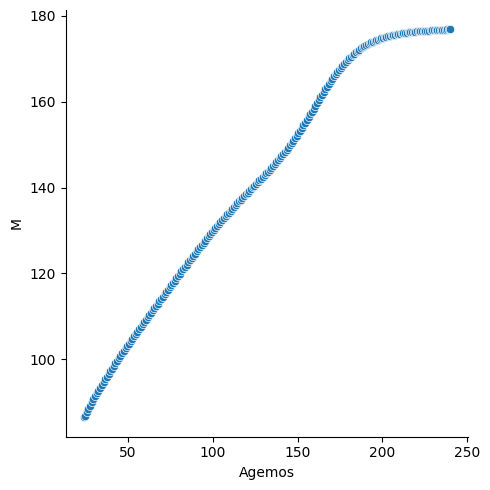

In [ ]:
sns.relplot(
    x=chicos.Agemos,
    y=chicos.M
)

Con [regresión local] (no se aprecia muy bien)(https://https://es.wikipedia.org/wiki/Regresi%C3%B3n_local)

<Axes: xlabel='Agemos', ylabel='M'>

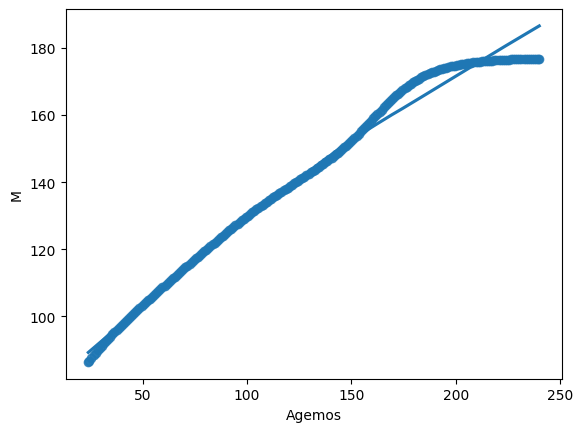

In [ ]:
sns.regplot(
    x=chicos.Agemos,
    y=chicos.M,
    lowess=True
)


Mostrando solo la línea



<Axes: xlabel='Agemos', ylabel='M'>

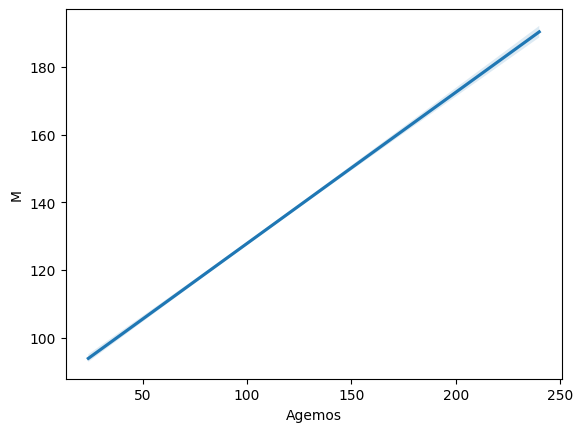

In [ ]:
sns.regplot(
    x=chicos.Agemos,
    y=chicos.M,
    scatter=False
)

<Axes: xlabel='Agemos', ylabel='M'>

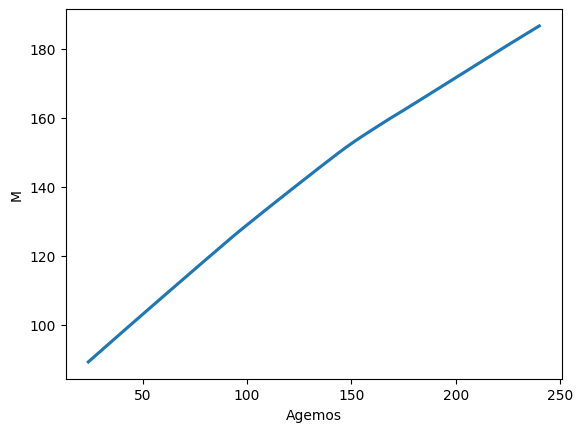

In [ ]:
# lowess: la regresión es local
# scatter=False --> para que no te aparezcan la serpientecilla

sns.regplot(
    data=chicos,
    x="Agemos",
    y="M",
    lowess=True,
    scatter=False
)

Ejercicio: escribe la función regresionLineal, que recibe una serie de puntos y devuelve los datos de la recta de regresión asociada:

def regresionLineal(x, y):
       ...

       return b0, b1, r

x - un vector con las coordenadas x de los puntos

y - un vector con las coordenadas y de los puntos


Devuelve:
b0 - término independiente de la recta de regresión

b1 - pendiente de la recta de regresión

r - correlación

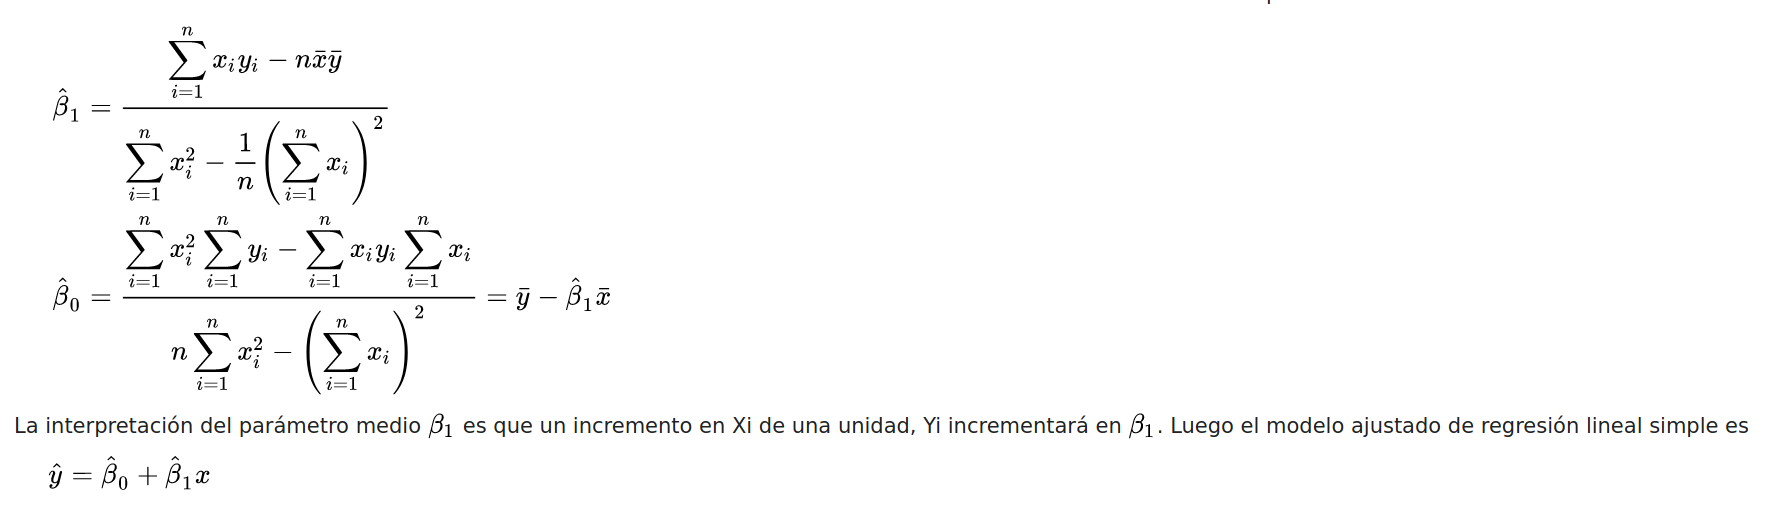


La fórmula para r

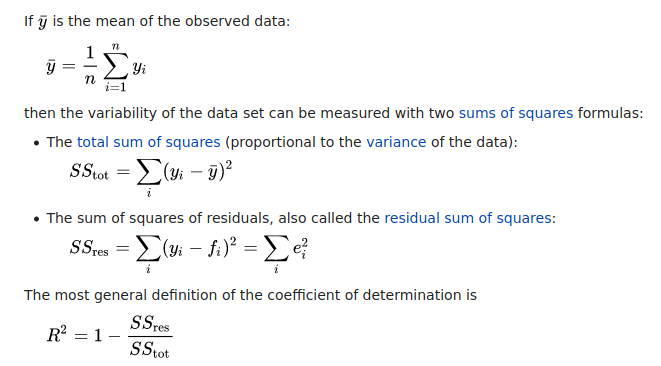



Empezamos calculando b1 para los datos de los chicos. x será la edad, y será la altura mediana a esa edad

In [ ]:
x = chicos.Agemos
y = chicos.M
n = len(x)

In [ ]:
b1num = np.sum(x * y) - n * np.mean(x) * np.mean(y)
b1dem = np.sum(x * x) - (1/n) * np.sum(x)**2
b1 = b1num / b1dem
b1

0.4463210345877507

Ahora b0

In [ ]:
b0 = y.mean() - b1 * x.mean()
b0

83.19580579510497

Coeficiente de determinación

In [ ]:
sstot = np.sum((y - y.mean())**2)
sstot

176149.5861416977

In [ ]:
#calculamos f(y) los puntos que predice la función ajustada para los valores de x
fx = [b0 + b1 * valor for valor in x]

# ahora los errores
error = y - fx
ssres = np.sum(error**2)

In [ ]:
r2 = 1 - ssres / sstot
r2

0.9760751514779579

In [ ]:
# altura a loss 480 meses (40 años)?
b0 + b1 * 480

297.4299023972253

Para comprobarlo, usamos el método de scikit

In [ ]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(np.expand_dims(x, 1), y)

# coeficiente correlación, r
print(reg.score(np.expand_dims(x, 1), y))

# pendiente b1
print(reg.coef_)

# término independiente b0
print(reg.intercept_)

# altura a loss 480 meses (40 años)?
matriz = np.array([480])
print(reg.predict(np.array(np.expand_dims(matriz, 1))))

0.9760751514779579
[0.44632103]
83.19580579510503
[297.4299024]
